In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Resources/Big_Black_Money_Dataset.csv")
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [3]:
#Rename columns
df.rename(columns={
    'Transaction ID': 'transaction_id',
    'Country': 'country',
    'Amount (USD)': 'amount_usd',
    'Transaction Type': 'transaction_type',
    'Date of Transaction': 'transaction_date',
    'Person Involved': 'person_involved',
    'Industry': 'industry',
    'Destination Country': 'destination_country',
    'Reported by Authority': 'reported_by_authority',
    'Source of Money': 'source_of_money',
    'Money Laundering Risk Score': 'risk_score',
    'Shell Companies Involved': 'shell_co_involved',
    'Financial Institution': 'financial_ins',
    'Tax Haven Country': 'tax_country'
}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         10000 non-null  object 
 1   country                10000 non-null  object 
 2   amount_usd             10000 non-null  float64
 3   transaction_type       10000 non-null  object 
 4   transaction_date       10000 non-null  object 
 5   person_involved        10000 non-null  object 
 6   industry               10000 non-null  object 
 7   destination_country    10000 non-null  object 
 8   reported_by_authority  10000 non-null  bool   
 9   source_of_money        10000 non-null  object 
 10  risk_score             10000 non-null  int64  
 11  shell_co_involved      10000 non-null  int64  
 12  financial_ins          10000 non-null  object 
 13  tax_country            10000 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(10)
memory usa

In [5]:
df.dtypes

transaction_id            object
country                   object
amount_usd               float64
transaction_type          object
transaction_date          object
person_involved           object
industry                  object
destination_country       object
reported_by_authority       bool
source_of_money           object
risk_score                 int64
shell_co_involved          int64
financial_ins             object
tax_country               object
dtype: object

In [6]:
# Format the transaction_date column to datetime format  
df["transaction_date"] = pd.to_datetime(df["transaction_date"])
df.head()

,transaction_id,country,amount_usd,transaction_type,transaction_date,person_involved,industry,destination_country,reported_by_authority,source_of_money,risk_score,shell_co_involved,financial_ins,tax_country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [7]:
# Export the DataFrame as a CSV file.
df.to_csv("cleaned_dataset.csv", index=False)

In [8]:
df.source_of_money.value_counts()

source_of_money
Illegal    7017
Legal      2983
Name: count, dtype: int64

In [9]:
df.transaction_type.value_counts()

transaction_type
Property Purchase    2086
Stocks Transfer      1983
Offshore Transfer    1980
Cash Withdrawal      1978
Cryptocurrency       1973
Name: count, dtype: int64

In [10]:
df.industry.value_counts()

industry
Finance         1475
Construction    1460
Luxury Goods    1459
Real Estate     1443
Arms Trade      1414
Casinos         1377
Oil & Gas       1372
Name: count, dtype: int64

In [11]:
df.reported_by_authority.value_counts()

reported_by_authority
False    7995
True     2005
Name: count, dtype: int64

# Pre-processing & Feature Engineering

In [12]:
# NO IMPUTATION NEEDED - b/c NO NULL VALUES 
# source_of_money and reported_by_authority have 2 categories - a BINARY / BOOLEAN class - ORDINAL Encording
# transaction_type has 5 categories and industry has 7 categories => One Hot Encoding (get dummies)

In [13]:
# Label(original) Encode 0/1 manualy
df["reported_by_authority"] = df.reported_by_authority.apply(lambda x: 0 if x == True else 1) # manual way
df["source_of_money"] = df.source_of_money.apply(lambda x: 0 if x == 'Illegal' else 1) # manual way
df.head()

,transaction_id,country,amount_usd,transaction_type,transaction_date,person_involved,industry,destination_country,reported_by_authority,source_of_money,risk_score,shell_co_involved,financial_ins,tax_country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,0,0,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,1,0,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,0,0,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,1,0,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,0,0,1,9,Bank_57,Luxembourg


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   transaction_id         10000 non-null  object        
 1   country                10000 non-null  object        
 2   amount_usd             10000 non-null  float64       
 3   transaction_type       10000 non-null  object        
 4   transaction_date       10000 non-null  datetime64[ns]
 5   person_involved        10000 non-null  object        
 6   industry               10000 non-null  object        
 7   destination_country    10000 non-null  object        
 8   reported_by_authority  10000 non-null  int64         
 9   source_of_money        10000 non-null  int64         
 10  risk_score             10000 non-null  int64         
 11  shell_co_involved      10000 non-null  int64         
 12  financial_ins          10000 non-null  object        
 13  ta

In [15]:
# Drop useless columns and move on to Encoding
cols_to_drop = ['country', 'transaction_date', 'person_involved',
       'destination_country','financial_ins', 'tax_country', 'transaction_id']
df = df.drop(columns=cols_to_drop)
df.head()

,amount_usd,transaction_type,industry,reported_by_authority,source_of_money,risk_score,shell_co_involved
0,3.267530e+06,Offshore Transfer,Construction,0,0,6,1
1,4.965767e+06,Stocks Transfer,Luxury Goods,1,0,9,0
2,9.416750e+04,Stocks Transfer,Construction,0,0,1,3
3,3.864201e+05,Cash Withdrawal,Oil & Gas,1,0,7,2
4,6.433784e+05,Cryptocurrency,Real Estate,0,0,1,9


In [16]:
# Encoding / scaling
# Break up your columns into num and catagogy comumns

In [17]:
df.columns

Index(['amount_usd', 'transaction_type', 'industry', 'reported_by_authority',
       'source_of_money', 'risk_score', 'shell_co_involved'],
      dtype='object')

In [18]:
num_cols = ['amount_usd', 'risk_score', 'shell_co_involved']
cat_cols = ['transaction_type', 'industry']
meta = ['source_of_money', 'reported_by_authority']

In [19]:
# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])

# Transform the Data
df_scaled = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols)
df_scaled.head()

,amount_usd,risk_score,shell_co_involved
0,0.537609,0.163680,-1.204808
1,1.729945,1.200501,-1.552075
2,-1.690418,-1.564356,-0.510274
3,-1.485226,0.509287,-0.857541
4,-1.304815,-1.564356,1.573328


In [20]:
# Numeric feature are ready to go now=>
# Categories up next
df_cat = df.loc[:, cat_cols]
df_cat.head()

,transaction_type,industry
0,Offshore Transfer,Construction
1,Stocks Transfer,Luxury Goods
2,Stocks Transfer,Construction
3,Cash Withdrawal,Oil & Gas
4,Cryptocurrency,Real Estate


In [21]:
# One Hot Encoding
df_cat["transaction_type"] = df_cat.transaction_type.astype(str) # made transaction_type as string
df_cat["industry"] = df_cat.industry.astype(str)
df_cat = pd.get_dummies(df_cat, dtype=int) # OHE to make them interger)
df_cat.head()

,transaction_type_Cash Withdrawal,transaction_type_Cryptocurrency,transaction_type_Offshore Transfer,transaction_type_Property Purchase,transaction_type_Stocks Transfer,industry_Arms Trade,industry_Casinos,industry_Construction,industry_Finance,industry_Luxury Goods,industry_Oil & Gas,industry_Real Estate
0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,1


In [22]:
# put everything back together
df_final = df.loc[:, meta]
df_final = pd.concat([df_final, df_scaled], axis=1)
df_final = pd.concat([df_final, df_cat], axis=1)
df_final.head()

,source_of_money,reported_by_authority,amount_usd,risk_score,shell_co_involved,transaction_type_Cash Withdrawal,transaction_type_Cryptocurrency,transaction_type_Offshore Transfer,transaction_type_Property Purchase,transaction_type_Stocks Transfer,industry_Arms Trade,industry_Casinos,industry_Construction,industry_Finance,industry_Luxury Goods,industry_Oil & Gas,industry_Real Estate
0,0,0,0.537609,0.163680,-1.204808,0,0,1,0,0,0,0,1,0,0,0,0
1,0,1,1.729945,1.200501,-1.552075,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,-1.690418,-1.564356,-0.510274,0,0,0,0,1,0,0,1,0,0,0,0
3,0,1,-1.485226,0.509287,-0.857541,1,0,0,0,0,0,0,0,0,0,1,0
4,0,0,-1.304815,-1.564356,1.573328,0,1,0,0,0,0,0,0,0,0,0,1


# MACHINE LEARNING

In [23]:
ids = df_final.reported_by_authority
df_final = df_final.drop(columns=["reported_by_authority"])
df_final.head()

,source_of_money,amount_usd,risk_score,shell_co_involved,transaction_type_Cash Withdrawal,transaction_type_Cryptocurrency,transaction_type_Offshore Transfer,transaction_type_Property Purchase,transaction_type_Stocks Transfer,industry_Arms Trade,industry_Casinos,industry_Construction,industry_Finance,industry_Luxury Goods,industry_Oil & Gas,industry_Real Estate
0,0,0.537609,0.163680,-1.204808,0,0,1,0,0,0,0,1,0,0,0,0
1,0,1.729945,1.200501,-1.552075,0,0,0,0,1,0,0,0,0,1,0,0
2,0,-1.690418,-1.564356,-0.510274,0,0,0,0,1,0,0,1,0,0,0,0
3,0,-1.485226,0.509287,-0.857541,1,0,0,0,0,0,0,0,0,0,1,0
4,0,-1.304815,-1.564356,1.573328,0,1,0,0,0,0,0,0,0,0,0,1


In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   source_of_money                     10000 non-null  int64  
 1   amount_usd                          10000 non-null  float64
 2   risk_score                          10000 non-null  float64
 3   shell_co_involved                   10000 non-null  float64
 4   transaction_type_Cash Withdrawal    10000 non-null  int32  
 5   transaction_type_Cryptocurrency     10000 non-null  int32  
 6   transaction_type_Offshore Transfer  10000 non-null  int32  
 7   transaction_type_Property Purchase  10000 non-null  int32  
 8   transaction_type_Stocks Transfer    10000 non-null  int32  
 9   industry_Arms Trade                 10000 non-null  int32  
 10  industry_Casinos                    10000 non-null  int32  
 11  industry_Construction               10000 

In [25]:
df.reported_by_authority

0       0
1       1
2       0
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    0
9999    0
Name: reported_by_authority, Length: 10000, dtype: int64

In [26]:
df.reported_by_authority.value_counts()

reported_by_authority
1    7995
0    2005
Name: count, dtype: int64

In [27]:
# Feature selection
# correlation analysis
corrs = df_final.corr()
corrs

,source_of_money,amount_usd,risk_score,shell_co_involved,transaction_type_Cash Withdrawal,transaction_type_Cryptocurrency,transaction_type_Offshore Transfer,transaction_type_Property Purchase,transaction_type_Stocks Transfer,industry_Arms Trade,industry_Casinos,industry_Construction,industry_Finance,industry_Luxury Goods,industry_Oil & Gas,industry_Real Estate
source_of_money,1.000000,0.011386,-0.002059,-0.006620,-0.007702,0.007939,0.004040,-0.001750,-0.002483,-0.003636,-0.017608,0.013297,0.005552,-0.003851,-0.004617,0.010296
amount_usd,0.011386,1.000000,0.016529,-0.017905,0.001999,0.006722,0.009027,-0.018486,0.001110,0.012692,-0.005406,0.010555,0.009057,-0.010394,-0.009966,-0.006831
risk_score,-0.002059,0.016529,1.000000,-0.019262,0.004146,-0.003351,-0.009477,-0.003323,0.012061,0.006216,0.004127,0.008168,0.026662,-0.021834,-0.013583,-0.010091
shell_co_involved,-0.006620,-0.017905,-0.019262,1.000000,-0.012246,0.019885,0.011206,-0.007792,-0.010871,0.010392,0.017398,-0.013702,0.009072,-0.007757,-0.016857,0.001547
transaction_type_Cash Withdrawal,-0.007702,0.001999,0.004146,-0.012246,1.000000,-0.246183,-0.246727,-0.254936,-0.246960,0.001665,-0.000270,0.020768,-0.006906,0.008825,-0.005386,-0.018879
transaction_type_Cryptocurrency,0.007939,0.006722,-0.003351,0.019885,-0.246183,1.000000,-0.246339,-0.254534,-0.246571,0.005782,0.003878,-0.009292,-0.001430,0.000099,0.009717,-0.008369
transaction_type_Offshore Transfer,0.004040,0.009027,-0.009477,0.011206,-0.246727,-0.246339,1.000000,-0.255097,-0.247116,-0.013664,-0.000470,-0.008585,0.019072,0.008614,-0.012878,0.007346
transaction_type_Property Purchase,-0.001750,-0.018486,-0.003323,-0.007792,-0.254936,-0.254534,-0.255097,1.000000,-0.255337,0.005679,-0.004458,0.004492,-0.006722,-0.016278,0.001288,0.016103
transaction_type_Stocks Transfer,-0.002483,0.001110,0.012061,-0.010871,-0.246960,-0.246571,-0.247116,-0.255337,1.000000,0.000435,0.001413,-0.007471,-0.003885,-0.000938,0.007240,0.003464
industry_Arms Trade,-0.003636,0.012692,0.006216,0.010392,0.001665,0.005782,-0.013664,0.005679,0.000435,1.000000,-0.162169,-0.167794,-0.168802,-0.167727,-0.161827,-0.166649


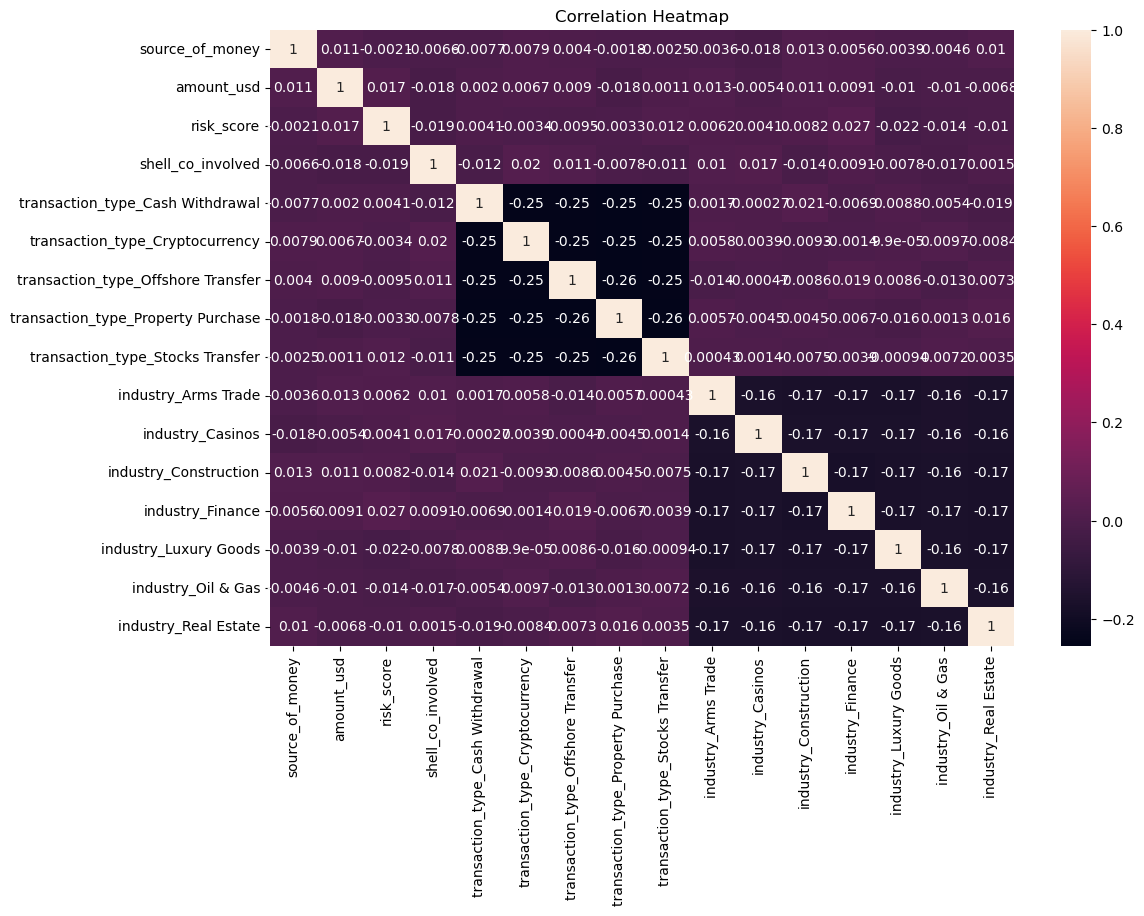

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(corrs, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [29]:
abs(corrs.source_of_money).sort_values(ascending=False)

source_of_money                       1.000000
industry_Casinos                      0.017608
industry_Construction                 0.013297
amount_usd                            0.011386
industry_Real Estate                  0.010296
transaction_type_Cryptocurrency       0.007939
transaction_type_Cash Withdrawal      0.007702
shell_co_involved                     0.006620
industry_Finance                      0.005552
industry_Oil & Gas                    0.004617
transaction_type_Offshore Transfer    0.004040
industry_Luxury Goods                 0.003851
industry_Arms Trade                   0.003636
transaction_type_Stocks Transfer      0.002483
risk_score                            0.002059
transaction_type_Property Purchase    0.001750
Name: source_of_money, dtype: float64

In [30]:
abs(corrs.risk_score).sort_values(ascending=False)

risk_score                            1.000000
industry_Finance                      0.026662
industry_Luxury Goods                 0.021834
shell_co_involved                     0.019262
amount_usd                            0.016529
industry_Oil & Gas                    0.013583
transaction_type_Stocks Transfer      0.012061
industry_Real Estate                  0.010091
transaction_type_Offshore Transfer    0.009477
industry_Construction                 0.008168
industry_Arms Trade                   0.006216
transaction_type_Cash Withdrawal      0.004146
industry_Casinos                      0.004127
transaction_type_Cryptocurrency       0.003351
transaction_type_Property Purchase    0.003323
source_of_money                       0.002059
Name: risk_score, dtype: float64

In [31]:
# Step 1: Get the Data
X = df_final.drop(columns=["source_of_money"])
y = df_final.source_of_money

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # stratify ensures same % of the target classes in the train/test

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(10000, 15)
(7500, 15)
(2500, 15)


In [32]:
# Export the DataFrame as a CSV file.
X_test.to_csv("Resources/test.csv", index=False)

In [33]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[5263    0]
 [2237    0]]
    
    AUC: 0.519574876472937

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      1.00      0.82      5263
           1       0.00      0.00      0.00      2237

    accuracy                           0.70      7500
   macro avg       0.35      0.50      0.41      7500
weighted avg       0.49      0.70      0.58      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1754    0]
 [ 746    0]]
    
    AUC: 0.4918653953735774

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      1.00      0.82      1754
           1       0.00      0.00      0.00       746

    accuracy                           0.70      2500
   macro avg       0.35      0.50      0.41      2500
weighted avg       0.49      0.70      0.58      2500

    


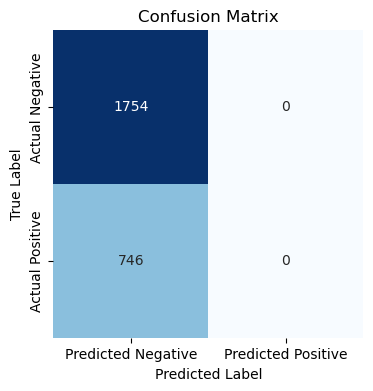

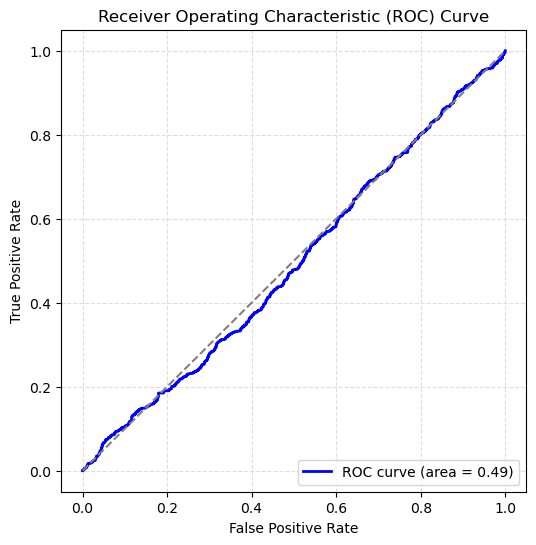

In [34]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[5263    0]
 [2237    0]]
    
    AUC: 0.7182842306905327

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      1.00      0.82      5263
           1       0.00      0.00      0.00      2237

    accuracy                           0.70      7500
   macro avg       0.35      0.50      0.41      7500
weighted avg       0.49      0.70      0.58      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1754    0]
 [ 746    0]]
    
    AUC: 0.5095278199809856

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      1.00      0.82      1754
           1       0.00      0.00      0.00       746

    accuracy                           0.70      2500
   macro avg       0.35      0.50      0.41      2500
weighted avg       0.49      0.70      0.58      2500

    


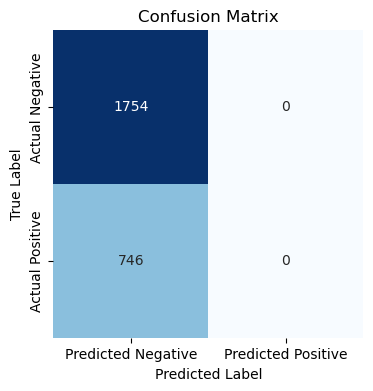

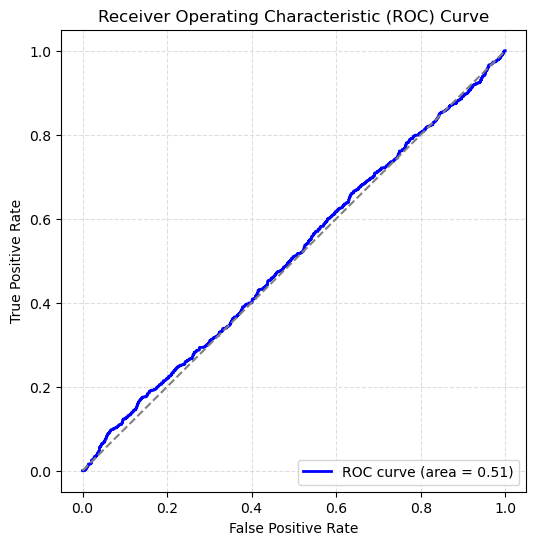

In [35]:
# Step 2: Init the Model
svc = SVC(probability=True)

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[4872  391]
 [1621  616]]
    
    AUC: 0.7390694273353905

    Classification Report:
                  precision    recall  f1-score   support

           0       0.75      0.93      0.83      5263
           1       0.61      0.28      0.38      2237

    accuracy                           0.73      7500
   macro avg       0.68      0.60      0.60      7500
weighted avg       0.71      0.73      0.69      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1534  220]
 [ 650   96]]
    
    AUC: 0.5116417166736467

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      0.87      0.78      1754
           1       0.30      0.13      0.18       746

    accuracy                           0.65      2500
   macro avg       0.50      0.50      0.48      2500
weighted avg       0.58      0.65      0.60      2500

    


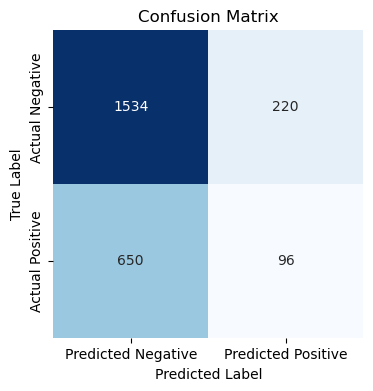

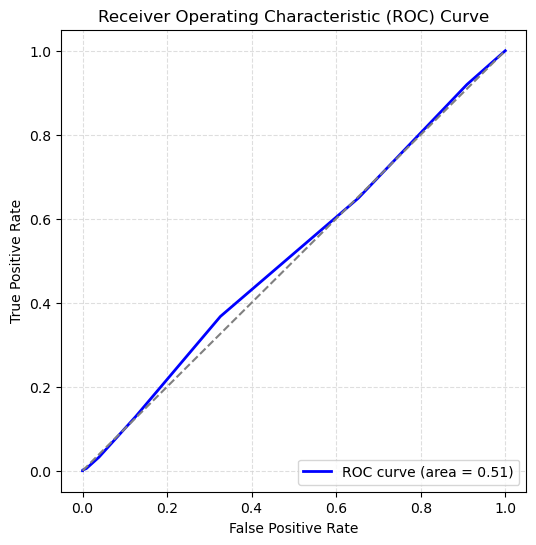

In [36]:
# Step 2: Init the Model
knn = KNeighborsClassifier(n_neighbors=7)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[5263    0]
 [   0 2237]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      5263
           1       1.00      1.00      1.00      2237

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1197  557]
 [ 523  223]]
    
    AUC: 0.4906838753855607

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      0.68      0.69      1754
           1       0.29      0.30      0.29       746

    accuracy                           0.57      2500
   macro avg       0.49      0.49      0.49      2500
weighted avg       0.57      0.57      0.57      2500

    


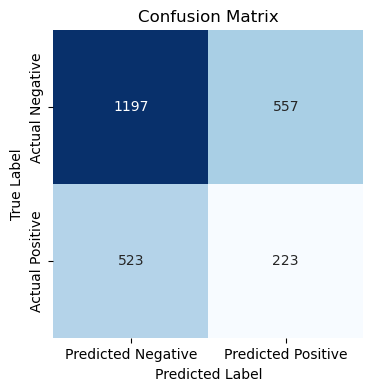

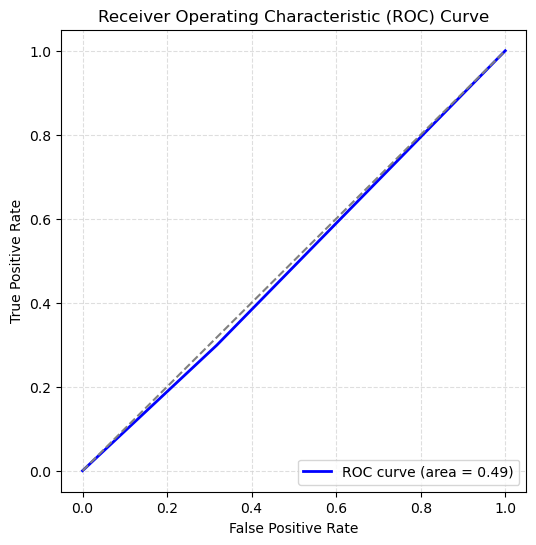

In [37]:
  # Step 2: Init the Model
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[5263    0]
 [   0 2237]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      5263
           1       1.00      1.00      1.00      2237

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1484  270]
 [ 627  119]]
    
    AUC: 0.5064949208396893

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      0.85      0.77      1754
           1       0.31      0.16      0.21       746

    accuracy                           0.64      2500
   macro avg       0.50      0.50      0.49      2500
weighted avg       0.58      0.64      0.60      2500

    


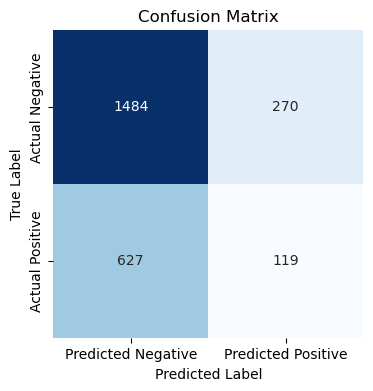

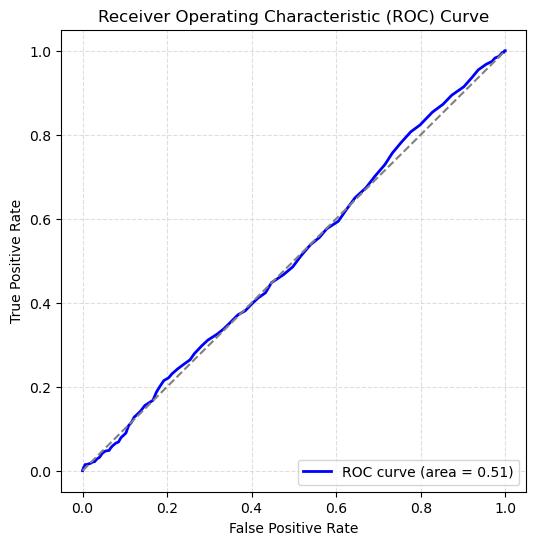

In [38]:
# Step 2: Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[5263    0]
 [   0 2237]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      5263
           1       1.00      1.00      1.00      2237

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1410  344]
 [ 595  151]]
    
    AUC: 0.49983072013108293

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      0.80      0.75      1754
           1       0.31      0.20      0.24       746

    accuracy                           0.62      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.58      0.62      0.60      2500

    


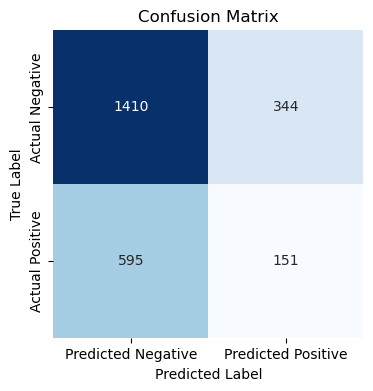

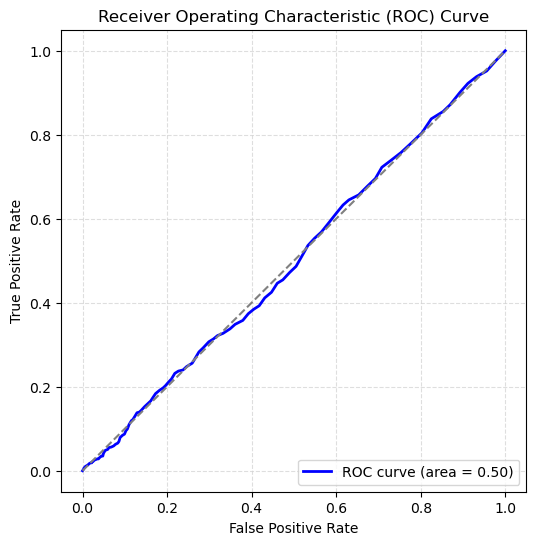

In [39]:
# Step 2: Init the Model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[5263    0]
 [2237    0]]
    
    AUC: 0.5210332572829218

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      1.00      0.82      5263
           1       0.00      0.00      0.00      2237

    accuracy                           0.70      7500
   macro avg       0.35      0.50      0.41      7500
weighted avg       0.49      0.70      0.58      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1754    0]
 [ 746    0]]
    
    AUC: 0.48049498503611815

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      1.00      0.82      1754
           1       0.00      0.00      0.00       746

    accuracy                           0.70      2500
   macro avg       0.35      0.50      0.41      2500
weighted avg       0.49      0.70      0.58      2500

    


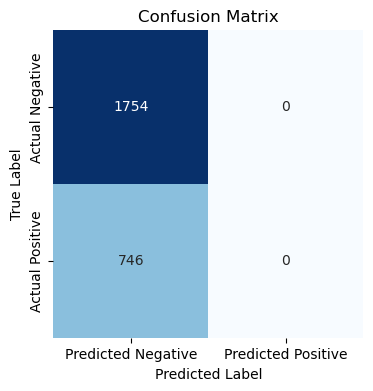

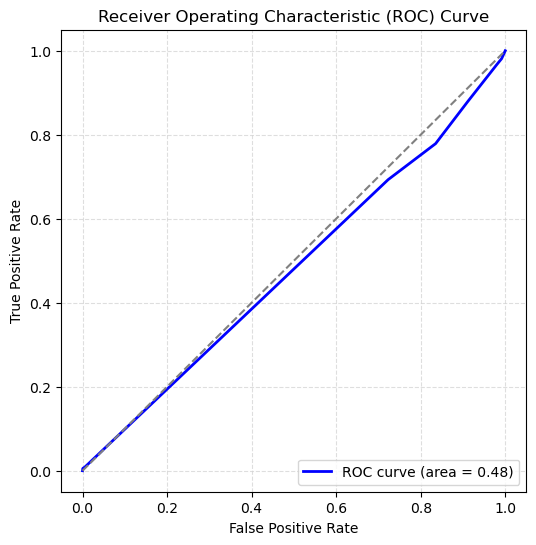

In [40]:
# Step 2: Init the Model (Ada sacrifices predictabilities for overfitting)
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

In [41]:
#Ada is better than Randomforest , but worse than logistic regresstion

TRAIN METRICS
    Confusion Matrix: 
    [[5260    3]
 [2191   46]]
    
    AUC: 0.682634209468841

    Classification Report:
                  precision    recall  f1-score   support

           0       0.71      1.00      0.83      5263
           1       0.94      0.02      0.04      2237

    accuracy                           0.71      7500
   macro avg       0.82      0.51      0.43      7500
weighted avg       0.78      0.71      0.59      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1750    4]
 [ 739    7]]
    
    AUC: 0.48507853363128633

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      1.00      0.82      1754
           1       0.64      0.01      0.02       746

    accuracy                           0.70      2500
   macro avg       0.67      0.50      0.42      2500
weighted avg       0.68      0.70      0.58      2500

    


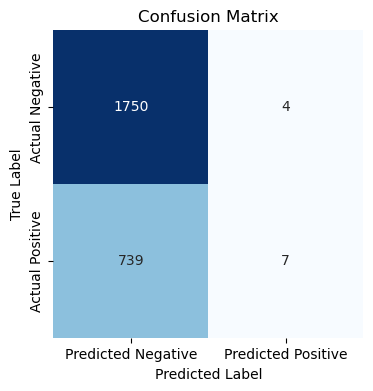

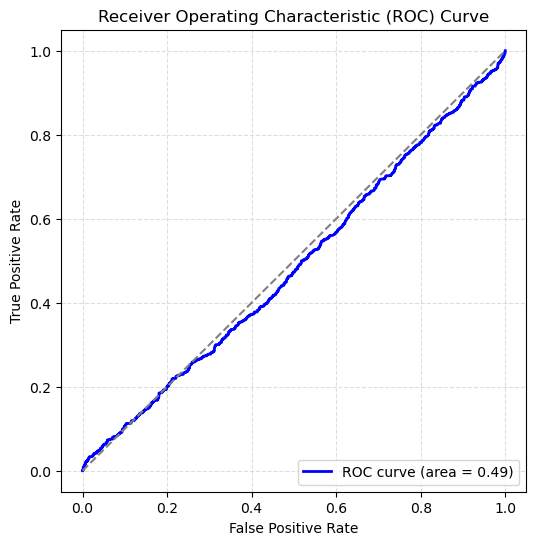

In [42]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [43]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[5177   86]
 [1202 1035]]
    
    AUC: 0.9277655151290658

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.98      0.89      5263
           1       0.92      0.46      0.62      2237

    accuracy                           0.83      7500
   macro avg       0.87      0.72      0.75      7500
weighted avg       0.84      0.83      0.81      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1571  183]
 [ 665   81]]
    
    AUC: 0.485306660226644

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      0.90      0.79      1754
           1       0.31      0.11      0.16       746

    accuracy                           0.66      2500
   macro avg       0.50      0.50      0.47      2500
weighted avg       0.58      0.66      0.60      2500

    


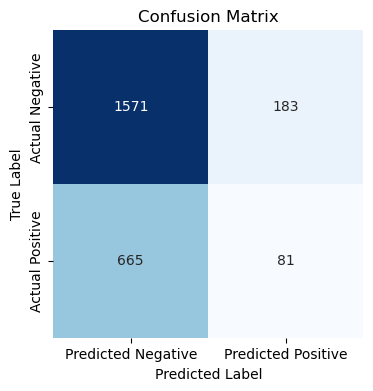

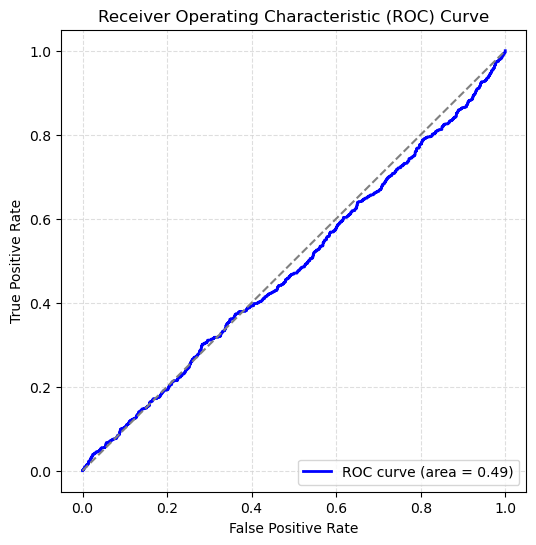

In [44]:
# Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[5233   30]
 [1956  281]]
    
    AUC: 0.8439604730385989

    Classification Report:
                  precision    recall  f1-score   support

           0       0.73      0.99      0.84      5263
           1       0.90      0.13      0.22      2237

    accuracy                           0.74      7500
   macro avg       0.82      0.56      0.53      7500
weighted avg       0.78      0.74      0.66      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1698   56]
 [ 722   24]]
    
    AUC: 0.5040737983804158

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      0.97      0.81      1754
           1       0.30      0.03      0.06       746

    accuracy                           0.69      2500
   macro avg       0.50      0.50      0.44      2500
weighted avg       0.58      0.69      0.59      2500

    


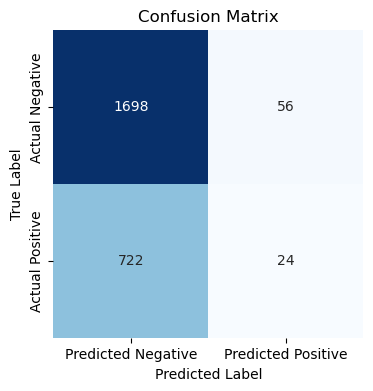

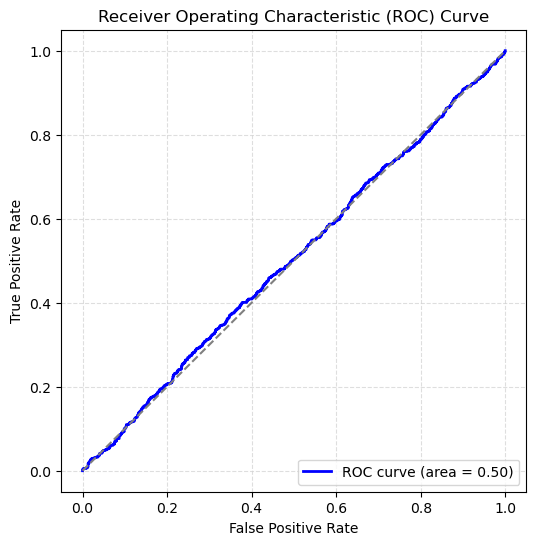

In [45]:
## Light GBM
# Step 2: Init the Model
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[5260    3]
 [2191   46]]
    
    AUC: 0.682634209468841

    Classification Report:
                  precision    recall  f1-score   support

           0       0.71      1.00      0.83      5263
           1       0.94      0.02      0.04      2237

    accuracy                           0.71      7500
   macro avg       0.82      0.51      0.43      7500
weighted avg       0.78      0.71      0.59      7500

    
TEST METRICS
    Confusion Matrix: 
    [[1750    4]
 [ 739    7]]
    
    AUC: 0.48507853363128633

    Classification Report:
                  precision    recall  f1-score   support

           0       0.70      1.00      0.82      1754
           1       0.64      0.01      0.02       746

    accuracy                           0.70      2500
   macro avg       0.67      0.50      0.42      2500
weighted avg       0.68      0.70      0.58      2500

    


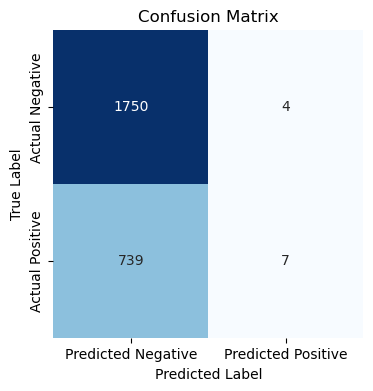

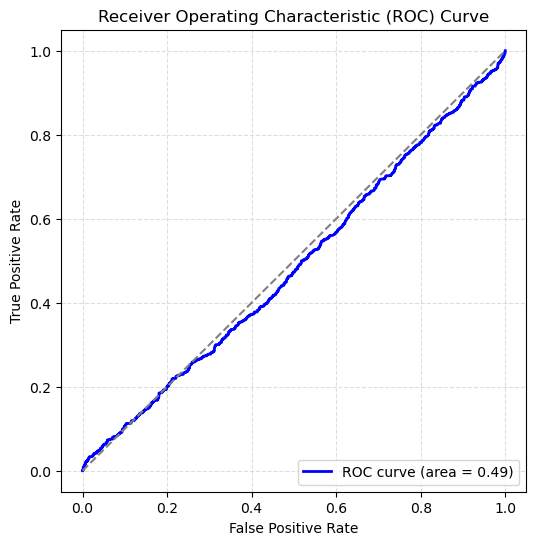

In [46]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [47]:
#check feature importance of Lgbm
fi = pd.DataFrame(list(zip(X.columns, lgbm.feature_importances_ / sum(lgbm.feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,amount_usd,0.463667
1,risk_score,0.162667
2,shell_co_involved,0.161333
6,transaction_type_Property Purchase,0.022667
5,transaction_type_Offshore Transfer,0.022000
7,transaction_type_Stocks Transfer,0.021667
10,industry_Construction,0.021000
4,transaction_type_Cryptocurrency,0.018333
12,industry_Luxury Goods,0.018333
3,transaction_type_Cash Withdrawal,0.017667


In [48]:
fi = pd.DataFrame(list(zip(X.columns, gb.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,amount_usd,0.628020
1,risk_score,0.109598
2,shell_co_involved,0.070178
10,industry_Construction,0.047678
7,transaction_type_Stocks Transfer,0.028697
11,industry_Finance,0.021488
6,transaction_type_Property Purchase,0.020935
12,industry_Luxury Goods,0.017796
5,transaction_type_Offshore Transfer,0.016883
4,transaction_type_Cryptocurrency,0.013497


In [49]:
# Retrain the model on the ENTIRE dataset then save this model 

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X, y) # fit my whole X and my whole y

GradientBoostingClassifier(random_state=42)

In [50]:
# Save off my models
  # For scikit-learn models, the best way to save the models off is a library called Pickle
import pickle

# CREATE 2 FILES NAMED Black_money Scalar and Black_money Model. Thse will be binary files that present the scalar(ss) and model itself
    # Scaler
pickle.dump(ss, open("black_money_scaler.h5", 'wb'))

    # Model
pickle.dump(gb, open("black_money_model.h5", 'wb'))

# Let's make some prediction on the TEST SET


In [51]:
df_test = pd.read_csv("Resources/test.csv")
df_test.head()

,amount_usd,risk_score,shell_co_involved,transaction_type_Cash Withdrawal,transaction_type_Cryptocurrency,transaction_type_Offshore Transfer,transaction_type_Property Purchase,transaction_type_Stocks Transfer,industry_Arms Trade,industry_Casinos,industry_Construction,industry_Finance,industry_Luxury Goods,industry_Oil & Gas,industry_Real Estate
0,0.659075,0.854894,-0.510274,1,0,0,0,0,0,0,0,0,0,0,1
1,1.473334,1.546108,-0.510274,0,0,0,1,0,0,0,1,0,0,0,0
2,-1.459657,-0.181928,-0.163007,0,0,0,0,1,0,0,0,0,0,1,0
3,-1.255249,1.200501,0.184260,0,0,0,0,1,0,0,0,0,1,0,0
4,1.496664,1.200501,-0.163007,0,0,0,0,1,0,1,0,0,0,0,0


In [52]:
#Encoding
#df_test["source_of_money"] = df_test.source_of_money.apply(lambda x: 0 if x == "Illegal" else 1)
df["reported_by_authority"] = df.reported_by_authority.apply(lambda x: 0 if x == True else 1) # manual way

# #df_test["transaction_date"] = df_test.transaction_date.astype(str)
# df_test["industry"] = df_test.industry.astype(str)
# df_test = pd.get_dummies(df_test, dtype=int)
# df_test.head()

In [53]:
import pickle

# Load your model
model = pickle.load(open("black_money_model.h5", 'rb'))

# If you have a scaler saved, load it
scaler = pickle.load(open("black_money_scaler.h5", 'rb'))  # Make sure this is the correct scaler file

# Transform your numeric columns
scaled_data = scaler.transform(df_test.loc[:, ['amount_usd', 'risk_score', 'shell_co_involved']])
df_scaled2 = pd.DataFrame(scaled_data, columns=['amount_usd', 'risk_score', 'shell_co_involved'])

# Replace the original columns with the scaled columns in your dataframe
df_test[['amount_usd', 'risk_score', 'shell_co_involved']] = df_scaled2

df_test.head()

,amount_usd,risk_score,shell_co_involved,transaction_type_Cash Withdrawal,transaction_type_Cryptocurrency,transaction_type_Offshore Transfer,transaction_type_Property Purchase,transaction_type_Stocks Transfer,industry_Arms Trade,industry_Casinos,industry_Construction,industry_Finance,industry_Luxury Goods,industry_Oil & Gas,industry_Real Estate
0,-1.756532,-1.614506,-1.729276,1,0,0,0,0,0,0,0,0,0,0,1
1,-1.756532,-1.375617,-1.729276,0,0,0,1,0,0,0,1,0,0,0,0
2,-1.756534,-1.972839,-1.608682,0,0,0,0,1,0,0,0,0,0,1,0
3,-1.756534,-1.495062,-1.488088,0,0,0,0,1,0,0,0,0,1,0,0
4,-1.756532,-1.495062,-1.608682,0,0,0,0,1,0,1,0,0,0,0,0


In [54]:
print(df_final.columns)

Index(['source_of_money', 'amount_usd', 'risk_score', 'shell_co_involved',
       'transaction_type_Cash Withdrawal', 'transaction_type_Cryptocurrency',
       'transaction_type_Offshore Transfer',
       'transaction_type_Property Purchase',
       'transaction_type_Stocks Transfer', 'industry_Arms Trade',
       'industry_Casinos', 'industry_Construction', 'industry_Finance',
       'industry_Luxury Goods', 'industry_Oil & Gas', 'industry_Real Estate'],
      dtype='object')


In [55]:
# model
model = pickle.load(open("black_money_model.h5", 'rb'))

# ensure columns in order
df_test = df_test.loc[:, ['amount_usd', 'risk_score',
       'shell_co_involved', 'transaction_type_Cash Withdrawal',
       'transaction_type_Cryptocurrency', 'transaction_type_Offshore Transfer',
       'transaction_type_Property Purchase',
       'transaction_type_Stocks Transfer', 'industry_Arms Trade',
       'industry_Casinos', 'industry_Construction', 'industry_Finance',
       'industry_Luxury Goods', 'industry_Oil & Gas', 'industry_Real Estate']]
preds = model.predict(df_test)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
print(len(ids))
print(len(preds))

10000
2500


In [57]:
submission = pd.DataFrame()
submission["transaction_id"] = ids[:len(preds)]  # Use only the relevant ids
submission["source_of_money"] = preds

In [58]:
submission.to_csv("Resources/black_money_submission.csv", index=False)